# 时间序列挖掘

https://mp.weixin.qq.com/s/9oz7N5T6mXTuw_2KN3l1YA

https://blog.csdn.net/qq_29831163/article/details/89440215

- 时间序列是按照时间排序的一组随机变量，时间序列数据本质上反映的是某个或者某些随机变量随时间不断变化的趋势。
- 单变量时间序列只有一个变量。
- 多变量时间序列有多个变量。

## 时间序列聚类

### 距离度量

#### DTW（dynamic time warping）

DTW 将自动 warping 扭曲时间序列，即在时间轴上进行局部的缩放，使得两个序列的形态尽可能的一致，得到最大可能的相似度。
对于序列X和序列Y，X的长度为m，Y的长度为n。
定义一个mxn的网格，网格的每个元素为X和Y对应的点的距离，DTW算法就是从网络的左上角到右下角求一条最短路径值。

#### 基于形状的距离 

参考论文：k-Shape--- Efficient and Accurate Clustering of Time Series

- 解决空间和时间上的偏差
- 采用cross-correlation:常用于信号或图形中为时间滞后计算相似性。
- 固定y序列不动，在y序列上滑动x序列，并求他们之间每一次滑动的內积。

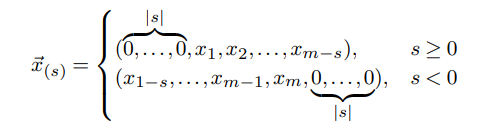
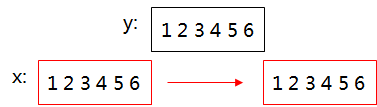

### 常用的聚类方法

#### 基于划分的聚类

##### K-means

- 主要思想：将每个样本分配到距离其最近的簇中心所在的簇。
- [改进kmeans。](https://blog.csdn.net/weixin_41798111/article/details/88238391?utm_medium=distribute.pc_relevant.none-task-blog-baidujs_title-1&spm=1001.2101.3001.4242)
- [选K值。](https://blog.csdn.net/sxllllwd/article/details/82151996)
- 优点：算法简单；高效。
- 缺点：只适用于簇状数据（易找到中心点）；且聚类中心容易受噪声影响；需要提前设置K值大小。

#### 基于密度的聚类

##### DBSCAN

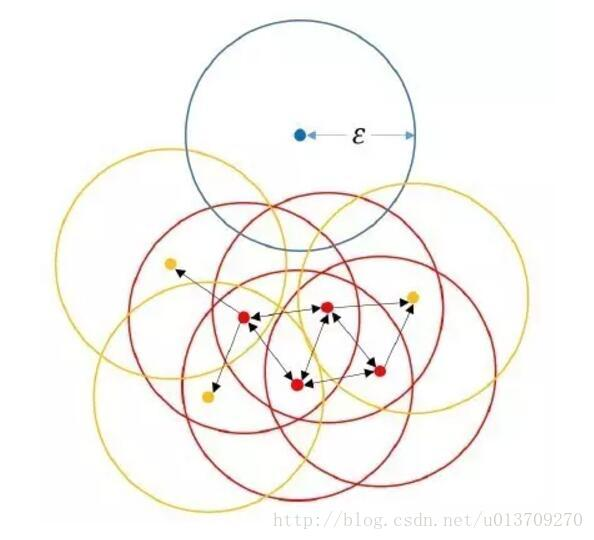

主要思想：发现高密度的点，然后与其领域内的点及其附近的高密度点连成一片，形成各种簇。

具体的：

- 两个参数：邻域大小和密度阈值
- 任选一个点p，以领域大小为半径化圈，落在圈内的点的数量即p的密度，如果密度大于密度阈值，则该点为高密度点。
- 如果一个高密度点落在另一个高密度点里，则将两个高密度点连接起来。
- 如果一个低密度点也落在一个高密度点里，则将该低密度点和该高密度点连接起来。并且该低密度点被称为边界点。
- 如果低密度点不落在任意一个高密度点内，该点为异常点。

In [1]:
# DBSCAN code

"""
date:20190718
author:Jade
theme:基于密度的聚类算法
"""
#输出标记数组，每个对象属于每个簇或者为噪声点

import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn import datasets

class visitlist(object):
    def __init__(self,count=0):
        self.unvisitedlist = [i for i in range(count)]#记录未访问过的点
        self.visitedlist = list()#记录已经访问过的点
        self.unvisitednum = count #记录未访问过的点数量

    def visit(self,pointId):
        self.visitedlist.append(pointId)
        self.unvisitedlist.remove(pointId)
        self.unvisitednum -= 1

def dist(a,b):
    """
    计算两个元组之间的欧几里得距离
    """
    return np.sqrt(np.power(a-b,2).sum())

def dbscan(dataSet,eps,minPts):
    """
    :param dataSet:
    :param eps: 0.1
    :param minPts: 10
    :return:
    """
    nPoints = dataSet.shape[0]
    vPoints = visitlist(count=nPoints)
    k = -1
    #初始所有数据标记为-1
    C = [-1 for i in range(nPoints)]
    while vPoints.unvisitednum>0:
        P = random.choice(vPoints.unvisitedlist)
        vPoints.visit(P)
        # N：求P的邻域
        N = [i for i in range(nPoints) if dist(dataSet[i],dataSet[P])<=eps]
        if len(N) >= minPts: #P的邻域里至少有minPts个对象
            # 创建新簇，把P添加到新簇
            k += 1
            C[P] = k
            for pl in N:
                if pl in vPoints.unvisitedlist:
                    vPoints.visit(pl)
                    M = [i for i in range(nPoints) if dist(dataSet[i],dataSet[pl]) <= eps]
                    if len(M) >= minPts:
                        for i in M:
                            if i not in N:
                                N.append(i) # N长度增加，循环次数也增多了
                    if C[pl] == -1:
                        C[pl] = k
        else:
            C[P] = -1
    return C

if __name__ == '__main__':
    X1, Y1 = datasets.make_circles(n_samples=2000, factor=0.6, noise=0.05,random_state=1)
    X2, Y2 = datasets.make_blobs(n_samples=500, n_features=2, centers=[[1.5,1.5]],cluster_std=[[0.1]], random_state=5)

    X = np.concatenate((X1,X2))
    y_pred = dbscan(X,0.1,10)
    plt.figure(figsize=(12,9),dpi=80)
    plt.scatter(X[:,0], X[:,1],c=y_pred,marker='.')
    plt.show()

<Figure size 960x720 with 1 Axes>

#### 基于层次的聚类

##### [层次聚类](https://zhuanlan.zhihu.com/p/32438294)

主要思想：通过计算不同类别之间的相似度来创建一颗有层次的嵌套的树。

具体的：

1、将每个样本看成一个聚类簇。

2、计算各聚类簇之间的相似度

3、将最相近的两个合并，归为一类，形成一个新的聚类簇。

4、重复步骤2-3，直到满足终止条件。

> 终止条件：达到K个簇；两个簇之间的距离超过一定阈值，就不能合并了。

#### 基于图的聚类

##### [谱聚类](https://www.cnblogs.com/pinard/p/6221564.html)

- 将每个样本看成一个点，点之间的连接状况用权重矩阵表示。权重矩阵是个N*N维的矩阵，相连为1，不相连为0。

> 事实上，我们会求相似度矩阵来代替权重矩阵。

> 相似矩阵的三种求法：ϵ阈值、KNN和全连接。

- 用图分割的方法去划分整个图，将整个图分割成K个小图，使其图与图之间的连接权重之和最小，目标函数如下：

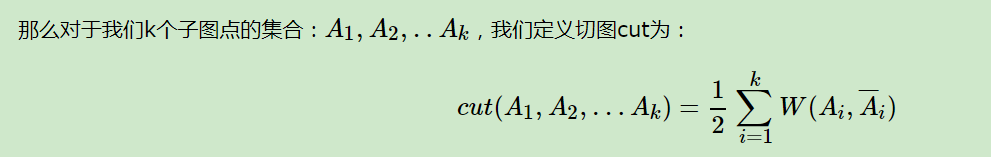

- 常用的分割方法有两种：Ratiocut(每个图的样本数量尽可能多)和Ncut(每个图图内样本间的权重尽可能大)，两种方法的目标函数都是基于上述目标函数上的改进。

通过公式变换，最终可转变为优化下列目标函数：

对于Ratiocut：

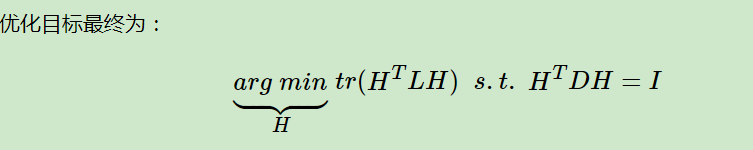

对于Ncut：

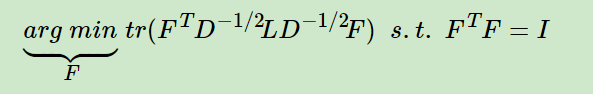

- 通过证明，优化的方式就是求L（拉普拉斯矩阵）或者标准化后的L的最小特征值对应的特征向量H。

- 最终对H做一次k-means得到最终聚类结果。

- 优点：能对高维数据进行降维
- 缺点：比较依赖相似距离度量

##### [AP聚类](https://blog.csdn.net/weixin_41521681/article/details/90511670)

把全部样本看成网络里的节点，通过网络中的边传递消息，计算出各样本的聚类中心。

消息分为两种：吸引度R(i,k)和归属度A(i,k)。

- 吸引信息（responsibility）矩阵R：𝑟(𝑖,𝑘)描述了数据对象k适合作为数据对象i的聚类中心的程度，表示的是从i到k的消息；
- 归属信息（availability）矩阵A：𝑎(𝑖,𝑘)描述了数据对象i选择数据对象k作为其据聚类中心的适合程度，表示从k到i的消息。

两个矩阵R ,A中的全部初始化为0. 可以看成Log-概率表。这个算法通过以下步骤迭代进行：
首先，吸引信息（responsibility）𝑟(𝑡+1)(𝑖,𝑘)按照下式进行迭代。
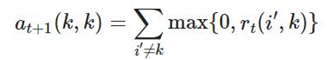
然后，归属信息（availability）𝑎(𝑡+1)(i,k)按照下面的式子迭代。
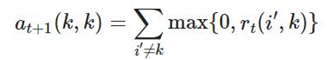
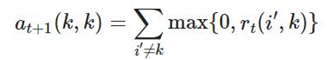
对以上步骤进行迭代，如果这些决策经过若干次迭代之后保持不变或者算法执行超过设定的迭代次数，又或者一个小区域内的关于样本点的决策经过数次迭代后保持不变，则算法结束。
最终，输出矩阵M=R+A，每个样本以其所在行中最大M值对应的样本为聚类中心。

In [3]:
import numpy as np
import os
import h5py

# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4,
#                             random_state=0)


def euclideanDistance(X, Y):
    """计算每个点与其他所有点之间的欧几里德距离"""
    X = np.array(X)
    Y = np.array(Y)
    # print X
    return np.sqrt(np.sum((X - Y) ** 2))


def computeSimilarity(datalist):
    num = len(datalist)

    Similarity = []
    for pointX in datalist:
        dists = []
        for pointY in datalist:
            dist = euclideanDistance(pointX, pointY)
            if dist == 0:
                dist = 1.5 # ？similarity的中值
            dists.append(dist * -1)
        Similarity.append(dists)
    return Similarity


def affinityPropagation(Similarity, lamda):
    # 初始化 吸引矩阵 和 归属 矩阵
    Responsibility = np.zeros_like(Similarity, dtype=np.int)
    Availability = np.zeros_like(Similarity, dtype=np.int)

    num = len(Responsibility)

    count = 0
    while count < 10:
        count += 1
        # update 吸引矩阵
        for Index in range(num):
            # print len(Similarity[Index])
            kSum = [s + a for s, a in zip(Similarity[Index], Availability[Index])]
            # print kSum
            for Kendex in range(num):
                kfit = delete(kSum, Kendex)
                # print fit
                ResponsibilityNew = Similarity[Index][Kendex] - max(kfit)
                Responsibility[Index][Kendex] = lamda * Responsibility[Index][Kendex] + (1 - lamda) * ResponsibilityNew
        # print "Responsibility", Responsibility
        # update 归属矩阵
        ResponsibilityT = Responsibility.T
        # print ResponsibilityT, Responsibility
        for Index in range(num):
            iSum = [r for r in ResponsibilityT[Index]]
            for Kendex in range(num):
                # print Kendex
                # print "ddddddddddddddddddddddddddd", ResponsibilityT[Kendex]
                #
                ifit = delete(iSum, Kendex)
                ifit = filter(isNonNegative, ifit)  # 上面 iSum  已经全部大于0  会导致  delete 下标错误
                #   k == K 对角线的情况
                if Kendex == Index:
                    AvailabilityNew = sum(ifit)
                else:
                    result = Responsibility[Kendex][Kendex] + sum(ifit)
                    AvailabilityNew = result if result > 0 else 0
                Availability[Kendex][Index] = lamda * Availability[Kendex][Index] + (1 - lamda) * AvailabilityNew
    return Responsibility + Availability


def computeCluster(fitable):
    clusters = {}
    num = len(fitable)
    part = np.zeros(num)
    for node in range(num):
        fit = list(fitable[node])
        key = fit.index(max(fit))
        if key not in clusters:
            clusters[key] = []
        clusters[key].append(node)
        part[node] = key
        # point = tuple(data[node])
        # clusters[key].append(point)
    return clusters,part


##############################################################################

"""切片删除 返回新数组"""


def delete(lt, index):
    lt = lt[:index] + lt[index + 1:]
    return lt


def isNonNegative(x):
    return x >= 0

# 输入是相似度矩阵
# fitable = affinityPropagation(Similarity, 0.5)
# clusters,part = computeCluster(fitable)

# print(len(np.unique(part)))
# print(part)

### 子空间聚类

- 当遇到高维的数据时，传统的聚类方法往往耗费大量的时间，且聚类效果也会受到影响。为解决这一问题，基于子空间的聚类方法被广泛提出。
- 基于子空间的聚类方法认为不同簇内的样本往往只与部分维度特征相关。

子空间聚类被分为：

- 硬子空间聚类：去除无关和冗余的特征，对降维后的数据进行聚类。
- 软子空间聚类：
    - 所有簇共享一个特征子空间：给每个特征分配一个权值，所有特征的权值相加为一。
    - 不同簇存在不同的特征子空间：给每个特征分配一个权值向量，即每个特征对不同簇的形成的重要性。

时间序列是由多个随机变量在一段连续时间下观测得到的一组数据，有着高维度和多变量的特点。目前已有的针对多元时间序列的聚类方法，要么计算用PCA对时间维进行降维，要么就是把所有的变量的时间序列拼接在一起，很少有研究考虑到每个变量的重要性。考虑到测试数据的变量并不多，不直接对变量进行降维，而是给每个变量分配权值，衡量其对每个簇的重要性的方法会更合理。

### 集成聚类

集成聚类主要包含两步：首先生成多个不同的聚类结果，然后整合多个聚类结果得到最终的聚类结果。

- 生成多个不同的聚类结果
    - 在不同参数设置下重复一个聚类算法
    - 采用不同的聚类方法
    - 在不同子空间或者子采样数据下运行聚类算法

- 整合多个聚类结果
     - pairwise-similarity的方法
     - graph-based的方法 
     - median partition-based的方法

### 半监督聚类 

成对限制矩阵-亲和矩阵（表示两个样本间的相关性）

## 时间序列分类

### ECG心电信号识别分类

参考资料：

- https://blog.csdn.net/qq_43750573/article/details/105930152
- https://blog.csdn.net/qq_15746879
- https://zhuanlan.zhihu.com/p/343265165

心电图是通过心电图机收集的心电信号变化。
心拍：心脏在一次生理周期内的心电信号变化。？一个完整的心拍主要由P波、QRS波群、T波、PR波段以及ST波段构成，不同波段分别反映了兴奋传导至心脏各部位的具体变化情况。

数据集：MIT-BIH数据集，48条记录，双导联，每条记录30分钟，采样率360hz。

心率：每分钟有多少个RR期间。

心律失常是十分常见的心血管疾病，主要表现为心脏搏动频率或节律的异常。心律失常若得不到及时治疗，可发作导致人死亡。正常心率记为（Normal,N），常见的心律失常疾病主要包括：房性期前收缩、室性期前收缩、左束支传导阻滞和右束支传导阻滞等

#### 数据预处理

数字滤波器：经典的数字滤波器根据频率范围的不同对噪声进行去噪
基于小波变换的阈值去噪：先对信号进行小波变换，再根据阈值对各层小波系数进行处理，最后重构信号实现去噪。

噪音：
- 工频干扰：采集设备环境带来的电磁干扰，一般呈正弦规律，会影响p波和T波的检验。
- 肌电干扰：人在运动时肌肉颤抖带来的干扰，使得波形急剧变化。
- 基线漂移：电极滑动或者人体呼吸运动带来的干扰，随着时间漂移，波形逐渐偏离基线轨道。

## 时间序列预测